# Machine Learning: Session 3

In [1]:
import graphviz
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import tree
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
CRED = '\033[91m'
CEND = '\033[0m'

## Task 1. Different distance measures in KNN (1 point)

The goal of this task is to understand better how different distance measures can affect the KNN performance. In addition, we are going to test the effect of normalizing input features and using weighted averaging for the nearest neighbours.

**(a)** Load the "wine" dataset from sklearn datasets, put input features into pandas dataframe and name the columns with feature names. <br>
Report the number of features and the number of classes in the dataset.

In [2]:
#Load dataset
wine = datasets.load_wine()
#HINTS:
#wine.data contains numpy array of dataset input features
#wine.target contains labels of instances
#wine.feature_names contains features labels

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    wine_train = pd.DataFrame(data=wine.data, columns=wine.feature_names)
    print(f"The number of features: {wine_train.shape[1]}, The number of classes: {len(np.unique(wine.target))}")
    display(wine_train.head())
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

The number of features: 13, The number of classes: 3


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**<font color='purple'>Answer to (a):</font>**

**(b)** Split the dataset into 80% training data and 20% test data using random seed = 22, and report the number of instances in the training set and in the test set.

In [3]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    trainX , testX, trainY, testY = train_test_split(wine_train, wine.target, test_size=0.2, random_state=22)
    num_train_instances = trainX.shape[0]
    num_test_instances = testX.shape[0]
    print(f"Training set instances: {num_train_instances}, Test set instances: {num_test_instances}")

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Training set instances: 142, Test set instances: 36


**<font color='purple'>Answer to (b):</font>**

**(c)** Use the KNN Classifier from Sklearn to fit a model for different values of K (3, 5, 7). Report test accuracy for each K. Report the best K to be used on this dataset.

In [4]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    k_values = [3, 5, 7]
    knn_accuracy_k_dict = {}
    for k in k_values:
        knn_model = KNeighborsClassifier(n_neighbors=k).fit(trainX, trainY)
        trianY_pred = knn_model.predict(testX)
        knn_accuracy = accuracy_score(testY, trianY_pred)
        knn_accuracy_k_dict[k] = knn_accuracy

    for key, value in knn_accuracy_k_dict.items():
        print(f"The k value: {key} and accuracy value: {value}")


    best_k = None
    best_accuracy = 0.0

    for key, value in knn_accuracy_k_dict.items():
        if value > best_accuracy:
            best_accuracy = value
            best_k = key

    print(f"The best K value: {best_k} with accuracy {best_accuracy}")

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

The k value: 3 and accuracy value: 0.6666666666666666
The k value: 5 and accuracy value: 0.6944444444444444
The k value: 7 and accuracy value: 0.6666666666666666
The best K value: 5 with accuracy 0.6944444444444444


**<font color='purple'>Answer to (c):</font>**

**(d)** Use the best value of K from the previous subtask, and try changing the distance metric used by KNN into euclidean, manhattan, chebyshev and minkowski with P = 3. Report the accuracy obtained with each metric. Report the best metric to be used on this dataset.

In [5]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    metrics, metric_accuracy_dict= ['minkowski', 'manhattan', 'euclidean', 'chebyshev'], {}

    for metric in metrics:

        if metric == 'minkowski':
            knn_model_distance = KNeighborsClassifier(n_neighbors=best_k, metric=metric, p=3).fit(trainX, trainY)
        else:
            knn_model_distance = KNeighborsClassifier(n_neighbors=best_k, metric=metric).fit(trainX, trainY)

        trianY_pred = knn_model_distance.predict(testX)
        model_accuracy = accuracy_score(testY, trianY_pred)
        metric_accuracy_dict[metric] = model_accuracy

    for key, value in metric_accuracy_dict.items():
        print(f"The metric: {key} and accuracy value: {value}")

    best_metric_accuracy = 0.0

    best_metric_name = ''

    for metric_name, metric_accuracy_value in metric_accuracy_dict.items():
        if metric_accuracy_value > best_metric_accuracy:
            best_metric_accuracy = metric_accuracy_value
            best_metric_name = metric_name

    print(f"The best metric: {best_metric_name} with accuracy {best_metric_accuracy}")
    
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

The metric: minkowski and accuracy value: 0.6944444444444444
The metric: manhattan and accuracy value: 0.7222222222222222
The metric: euclidean and accuracy value: 0.6944444444444444
The metric: chebyshev and accuracy value: 0.6666666666666666
The best metric: manhattan with accuracy 0.7222222222222222


**<font color='purple'>Answer to (d):</font>**

**(e)** Try to use weights for nearest neighbors according to the inverse of their distance from the test instance. Use the best K found in **(c)** and the best distance metric found in **(d)**. Report the accuracy and discuss whether it is better to use weights or not. (Hint: Read about `weights` parameter from <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">HERE</a>)

In [6]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    # adding weights
    knn_model_weighted = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric_name, weights='distance').fit(trainX, trainY)
    pred_weighted = knn_model_weighted.predict(testX)
    accuracy_weighted = accuracy_score(testY, pred_weighted)

    print(f"the K: {best_k}, metric: {best_metric_name}, using weights: {accuracy_weighted}")


    # without adding weights
    knn_model_unweighted = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric_name).fit(trainX, trainY)
    pred_unweighted = knn_model_unweighted.predict(testX)
    accuracy_unweighted = accuracy_score(testY, pred_unweighted)

    print(f"the K: {best_k}, metric: {best_metric_name}, without weights: {accuracy_unweighted}")
    
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

the K: 5, metric: manhattan, using weights: 0.8055555555555556
the K: 5, metric: manhattan, without weights: 0.7222222222222222


**<font color='purple'>Answer to (e):</font>** Yes, weights made accuracy better, it gives more weight to the nearest point

**(f)** Standardize the features in the whole dataset by subtracting the mean and dividing by standard deviation from each feature (The mean and standard deviation should be calculated from the training instances only). Predict the accuracy using best parameters found in **(c)**, **(d)**, and **(e)**. Is it better to standardize / normalize your features before using KNN? WHY?

In [7]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    
    # The mean and standard deviation should be calculated from the training instances only
    train_mean = trainX.mean()
    train_std = trainX.std()

    # standardizing train and test data
    trainX_stand = (trainX - train_mean) / train_std
    testX_stand = (testX - train_mean) / train_std

    knn_model_stand = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric_name, weights='distance').fit(trainX_stand, trainY)
    pred_stand = knn_model_stand.predict(testX_stand)
    accuracy_stand = accuracy_score(testY, pred_stand)

    print(f"Accuracy with K: {best_k}, metric: {best_metric_name}, using weights and standardize data: {accuracy_stand}")
    
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Accuracy with K: 5, metric: manhattan, using weights and standardize data: 0.9444444444444444


**<font color='purple'>Answer to (f):</font>** Models like knn is affected by the features. So, standardization make features with large scale close to the other features.

**(g)** Based on your observations during this task, write out what have you learnt so far when using the KNN learning algorithm.


**<font color='purple'>Answer to (g):</font>** I have learnt that every dataset needs to be understood very well; just to use the best K or best metric or does the data need standardization or not. It varys from dataset to another and it helped me to deepen my understandig of how each metric works and how standardization is cruical for the model performance.

## Task 2. Linear and polynomial kernels in SVM (2 points)

The goal of this task is to understand better how the choice of kernel and parameter values affect the performance of SVM. You are given a two-dimensional dataset with a binary label and two features: $x_1$ and $x_2$. Your class labels are generated from the features using the XOR function, such that the class is positive when either $x_1 > 0$ or $x_2 > 0$ but not both. The following code creates this dataset and plots it.

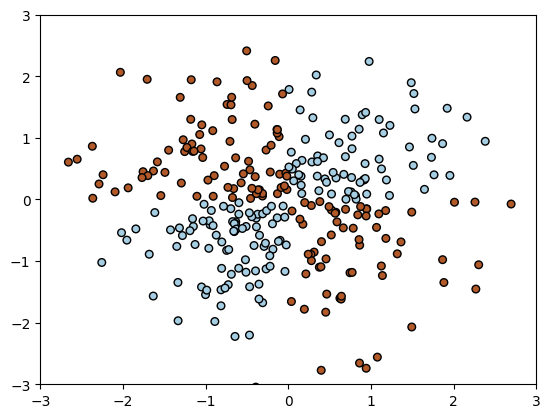

In [8]:
train_X = np.random.randn(300, 2)
train_Y = np.logical_xor(train_X[:, 0] > 0, train_X[:, 1] > 0)

plt.scatter(train_X[:, 0], train_X[:, 1], s=30, c=train_Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.axis([-3, 3, -3, 3])
plt.show()

- **(a)** Let's first learn SVM with the linear kernel. Please fill in the 2 gaps in the code.

In [9]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    
    
    # fit the model here:
    svm_model = svm.SVC(kernel='linear')
    svm_model.fit(train_X, train_Y)
    
    
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

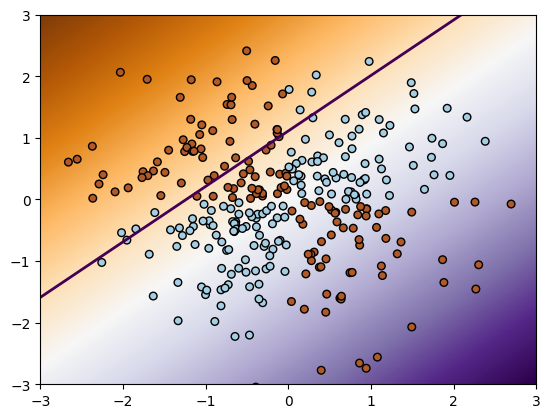

In [10]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

def plot_svm(model, X, Y, ax = None):
    # plots the decision function for each datapoint on the grid
    
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    if ax is None:
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
                   origin='lower', cmap=plt.cm.PuOr_r)
        contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
        plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        plt.axis([-3, 3, -3, 3])
        plt.show()
    else:
        ax.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
        contours = ax.contour(xx, yy, Z, levels=[0], linewidths=2)
        ax.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        ax.axis([-3, 3, -3, 3])

try:
    plot_svm(svm_model, train_X, train_Y)
except Exception as e:
    print("Exception:", e)

- **(b)** Can SVM with the linear kernel separate these data? 

**<font color='purple'>Answer to (b):</font>** No, it can't because it is not considered linearly serpable. A lot of points are nested together.


- **(c)** Now learn the SVM model with the polynomial kernel of degree 2 and degree 3. Which of them is able to learn the XOR function (not perfectly but reasonably well)?

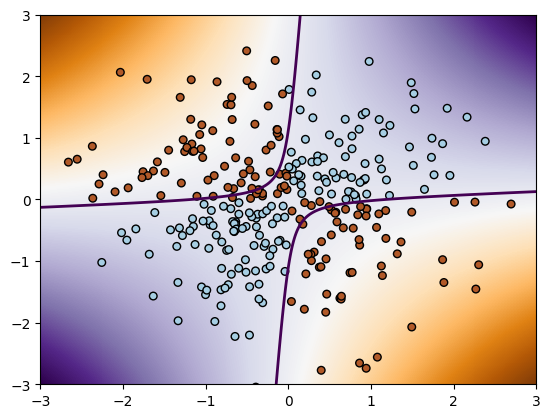

In [11]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Degree 2
    svm_model_deg2 = svm.SVC(kernel='poly', degree=2)
    svm_model_deg2.fit(train_X, train_Y)
    plot_svm(svm_model_deg2, train_X, train_Y)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

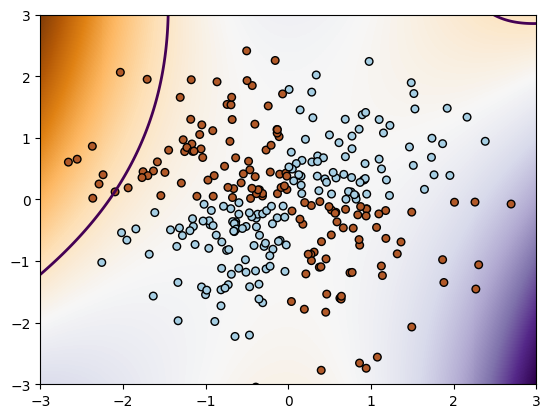

In [12]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Degree 3
    svm_model_deg3 = svm.SVC(kernel='poly', degree=3)
    svm_model_deg3.fit(train_X, train_Y)
    plot_svm(svm_model_deg3, train_X, train_Y)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (c):</font>** poly degree = 2 was able to learn the XOR function not perfectly but reasonably well and it perform better than poly degree = 3


- **(d)** Let us try to understand the reason why one degree worked well and the other not. Which of the following features is the most useful in discriminating the two classes: $x_1$, $x_2$, $x_1^2$, $x_2^2$, $x_1^3$, $x_2^3$, $x_1 x_2$, $x_1^2 x_2$, $x_2^2 x_1$? (Hint: If you cannot guess the right answer then you could visualize these as a surface, example code for $x_2^2 x_1$ is shown below where lighter colour is a hill and darker is valley)

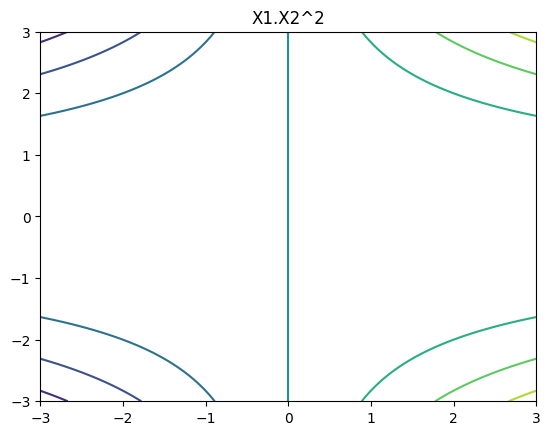

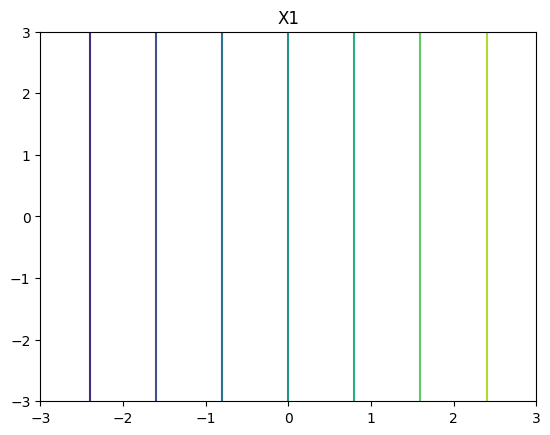

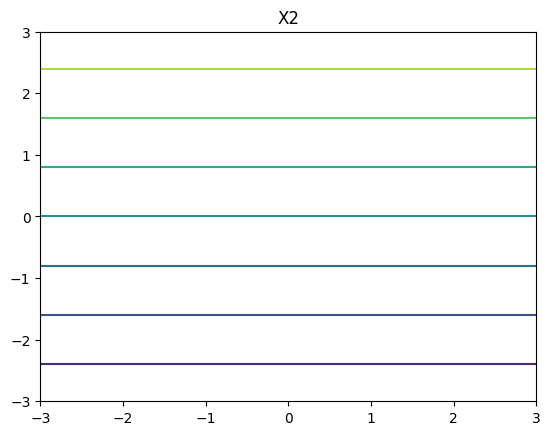

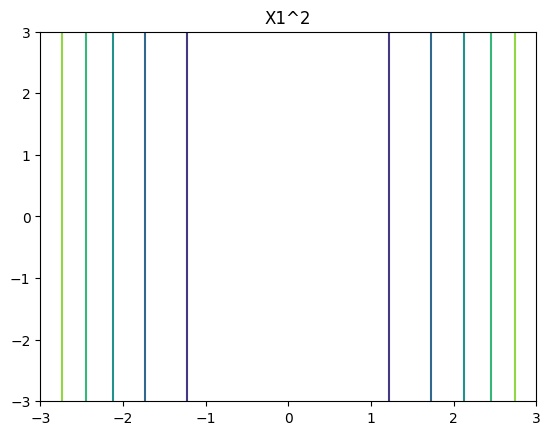

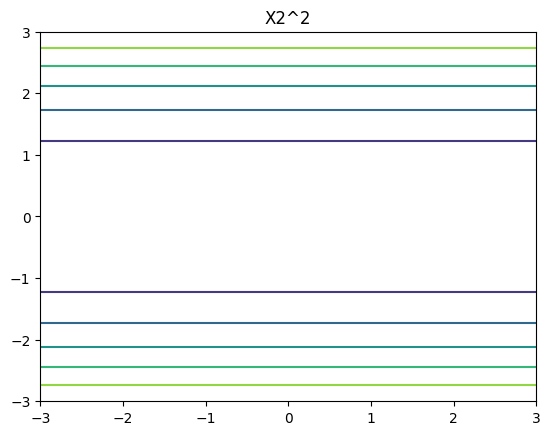

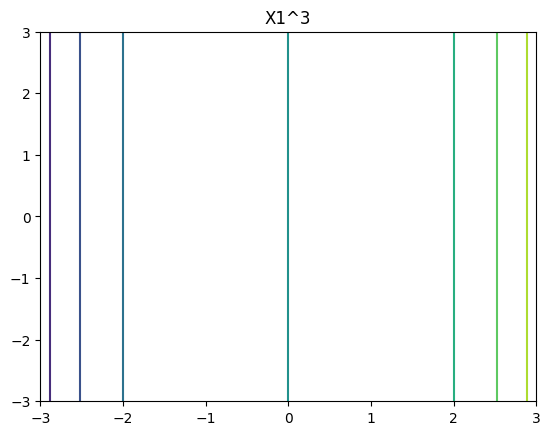

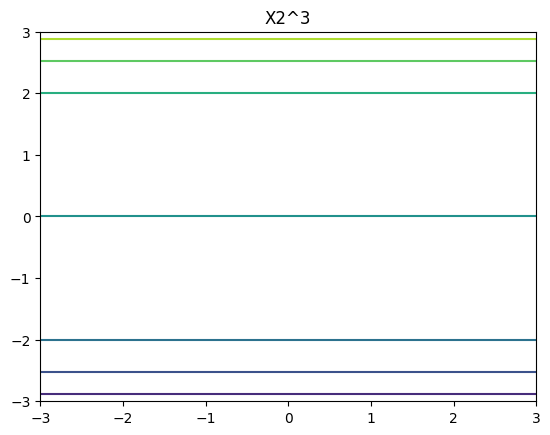

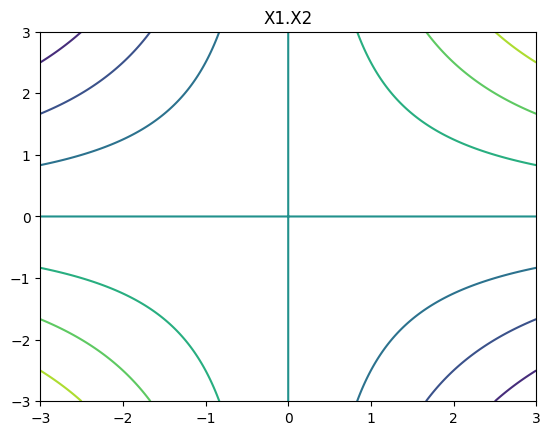

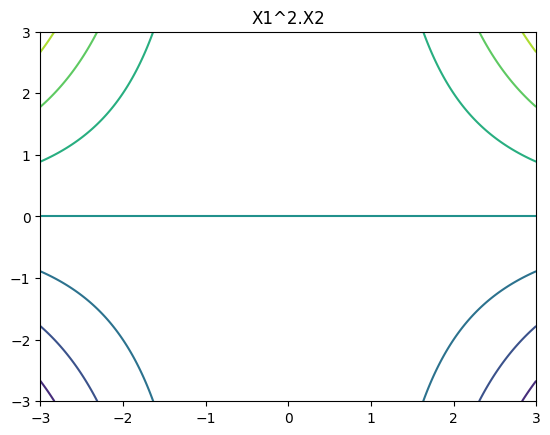

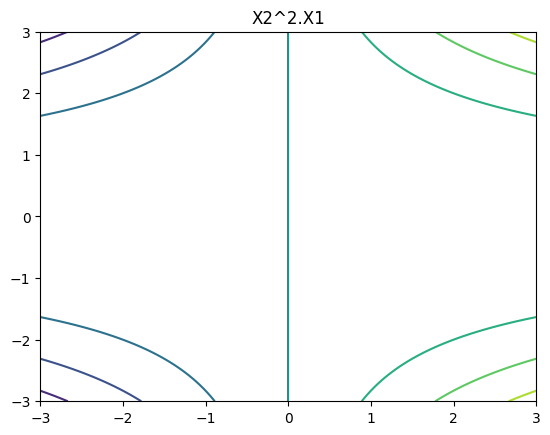

In [13]:
plt.contour(xx, yy, yy*yy*xx)
plt.title('X1.X2^2')
plt.show()
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Visualize rest of the features similarly as above
    plt.contour(xx, yy, xx)
    plt.title('X1')
    plt.show()
    
    plt.contour(xx, yy, yy)
    plt.title('X2')
    plt.show()

    plt.contour(xx, yy, xx*xx)
    plt.title('X1^2')
    plt.show()

    plt.contour(xx, yy, yy*yy)
    plt.title('X2^2')
    plt.show()

    plt.contour(xx, yy, xx*xx*xx)
    plt.title('X1^3')
    plt.show()

    plt.contour(xx, yy, yy*yy*yy)
    plt.title('X2^3')
    plt.show()

    plt.contour(xx, yy, xx*yy)
    plt.title('X1.X2')
    plt.show()

    plt.contour(xx, yy, xx*xx* yy)
    plt.title('X1^2.X2')
    plt.show()

    plt.contour(xx, yy, xx*yy*yy)
    plt.title('X2^2.X1')
    plt.show()

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (d):</font>** When I searched about what discriminating the two classes mean. I found out it means the ability to separate points of the two classes. As per my understanding I see that feature x1 and x2 were the best in separating points, other features might be useful in the decision boundary but not in discriminating like x1 and x2.


- **(e)** Expand the expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^2$ (open the brackets) where $\mathbf{x}=(x_1,x_2)$ and $\mathbf{z}=(z_1,z_2)$. **<font color='purple'>For this please modify the following code for your purpose:</font>** Hint: we did this in the practice session, but you can follow a similar example at page 51 of Lecture 05.

In [14]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    #Example
    # a, b = sp.symbols('a_1 b_2')
    # print(sp.expand( (a + b)**2 ))

    # (x.z)^2: this expression wants the sqaure of dot product between x z
    x1, x2, z1, z2 = sp.symbols('x_1 x_2 z_1 z_2')
    dot_product = x1 * z1 + x2 * z2
    expression = sp.expand(dot_product**2)
    print(expression)

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

x_1**2*z_1**2 + 2*x_1*x_2*z_1*z_2 + x_2**2*z_2**2


- **(f)** Please now list all features that are included in the constructed feature space $\phi(\mathbf{x})$ corresponding to the kernel $\kappa(\mathbf{x},\mathbf{z})=(\mathbf{x}\cdot\mathbf{z})^2$. Hint: You can read this out from your answer to **(e)** because $\kappa(\mathbf{x},\mathbf{z})=\phi(\mathbf{x})\cdot\phi(\mathbf{z})$.

**<font color='purple'>Answer to (f):</font>**
$\phi(x)=(x_1^2, \sqrt{2}x_1x_2, x_2^2)$

- **(g)** Is the best discriminator from subtask **(d)** present among the constructed features as listed in subtask **(f)**? Does this explain why polynomial kernel with degree 2 performed well / not well in subtask **(c)**? 

**<font color='purple'>Answer to (g):</font>** Yes, $x_1 , x_2$ from subtask d were present in subtask f $(x_1^2, \sqrt{2}x_1x_2, x_2^2)$. Yes, it does explain why polynomial kernel with degree 2 performed well and it's because $x_1 , x_2$ were in the degree 2 kernel’s feature space that directly affected with its better performance in this task.


- **(h)** Please now expand the expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^3$ similarly to subtask **(e)** and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel, as in subtask **(f)**. 

In [15]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    
    # (X . Z)^3
    x1, x2, z1, z2 = sp.symbols('x_1 x_2 z_1 z_2')
    dot_product = x1 * z1 + x2 * z2
    expression = sp.expand(dot_product**3)
    print(expression)
    
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)


x_1**3*z_1**3 + 3*x_1**2*x_2*z_1**2*z_2 + 3*x_1*x_2**2*z_1*z_2**2 + x_2**3*z_2**3


**<font color='purple'>Answer to (h):</font>**
$\phi(x)=(x_1^3 , \sqrt(3)x_1^2x_2 , \sqrt(3)x_1x_2^2 , x_2^3 )$


- **(i)** Is the best discriminator from subtask **(d)** present among the constructed features as listed in subtask **(h)**? Does this explain why polynomial kernel with degree 3 performed well / not well in subtask **(c)**? 

**<font color='purple'>Answer to (i):</font>** No , $x_1 , x_2$ from subtask d weren't present in subtask h $(x_1^3 , \sqrt(3)x_1^2x_2 , \sqrt(3)x_1x_2^2 , x_2^3 )$. Yes, it does explain why polynomial kernel with degree 3 performed not well and it's because the complexity, it wasn't solving the xor problem effectively.


- **(j)** The polynomial kernel is actually defined by $\kappa(\mathbf{x},\mathbf{z}) = (\mathbf{x}\cdot\mathbf{z}+r)^d$, but by default this r is 0. Take $r = 1$ and $d = 3$ and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel. Is the necessary feature present now?

In [16]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    
    # (X . Z + 1)^3
    x1, x2, z1, z2 = sp.symbols('x_1 x_2 z_1 z_2')
    dot_product = (x1 * z1 + x2 * z2) + 1
    expression = sp.expand(dot_product**3)
    print(expression)    

    
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)


x_1**3*z_1**3 + 3*x_1**2*x_2*z_1**2*z_2 + 3*x_1**2*z_1**2 + 3*x_1*x_2**2*z_1*z_2**2 + 6*x_1*x_2*z_1*z_2 + 3*x_1*z_1 + x_2**3*z_2**3 + 3*x_2**2*z_2**2 + 3*x_2*z_2 + 1


**<font color='purple'>Answer to (j):</font>**
$\phi(x)=(x_1^3 , \sqrt(3)x_1^2x_2 , \sqrt(3)x_1^2 , \sqrt(3)x_1x_2^2 , \sqrt(6)x_1x_2 , \sqrt(3)x_1 , x_2^3 , \sqrt(3)x_2^2 , \sqrt(3)x_2 , 1 )$


- **(k)** The value $r$ is represented by parameter 'coef0' in the SVC function. Change it to 1 and see if you can now learn XOR with polynomial kernel of degree 3. Make the resulting plot and report if learning of XOR succeeded.

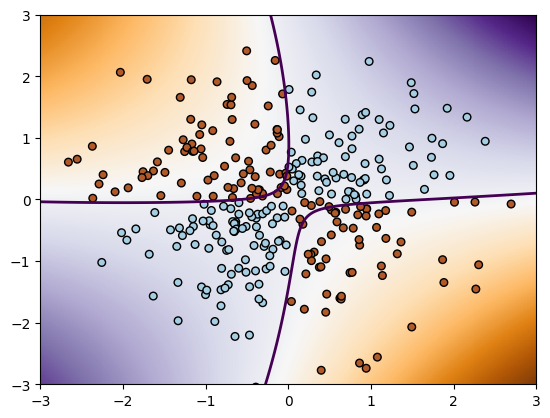

In [17]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    
    svm_model_deg3_r = svm.SVC(kernel='poly', degree=3, coef0=1)
    svm_model_deg3_r.fit(train_X, train_Y)
    plot_svm(svm_model_deg3_r, train_X, train_Y)
    
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (k):</font>** After changing r value to 1 and plotting poly degree 3 with the edit, it was noted that a poly degree 3 was able to succeed in learning XOR and provide much better performance.


## Task 3: Gaussian kernel in SVM (1 point)

- **(a)** Make __6__ plots and show how RBF kernel works with different C values: 0.1, 0.5, 1, 2, 10, 100. What do you observe? What does parameter C do? 

    - Hint 1: Remember the soft-margin SVM formula and check out what the C parameter stood for. 
    - Hint 2: Use `plt.subplots(2, 3, figsize=...)` to arrange them nicely and `plot_svm(svm_model, train_X, train_Y, ax=ax[i][j])` to plot to the subplot in row i and column j. 
    - Hint 3: Make sure you run `plt.show()` after the plotting.

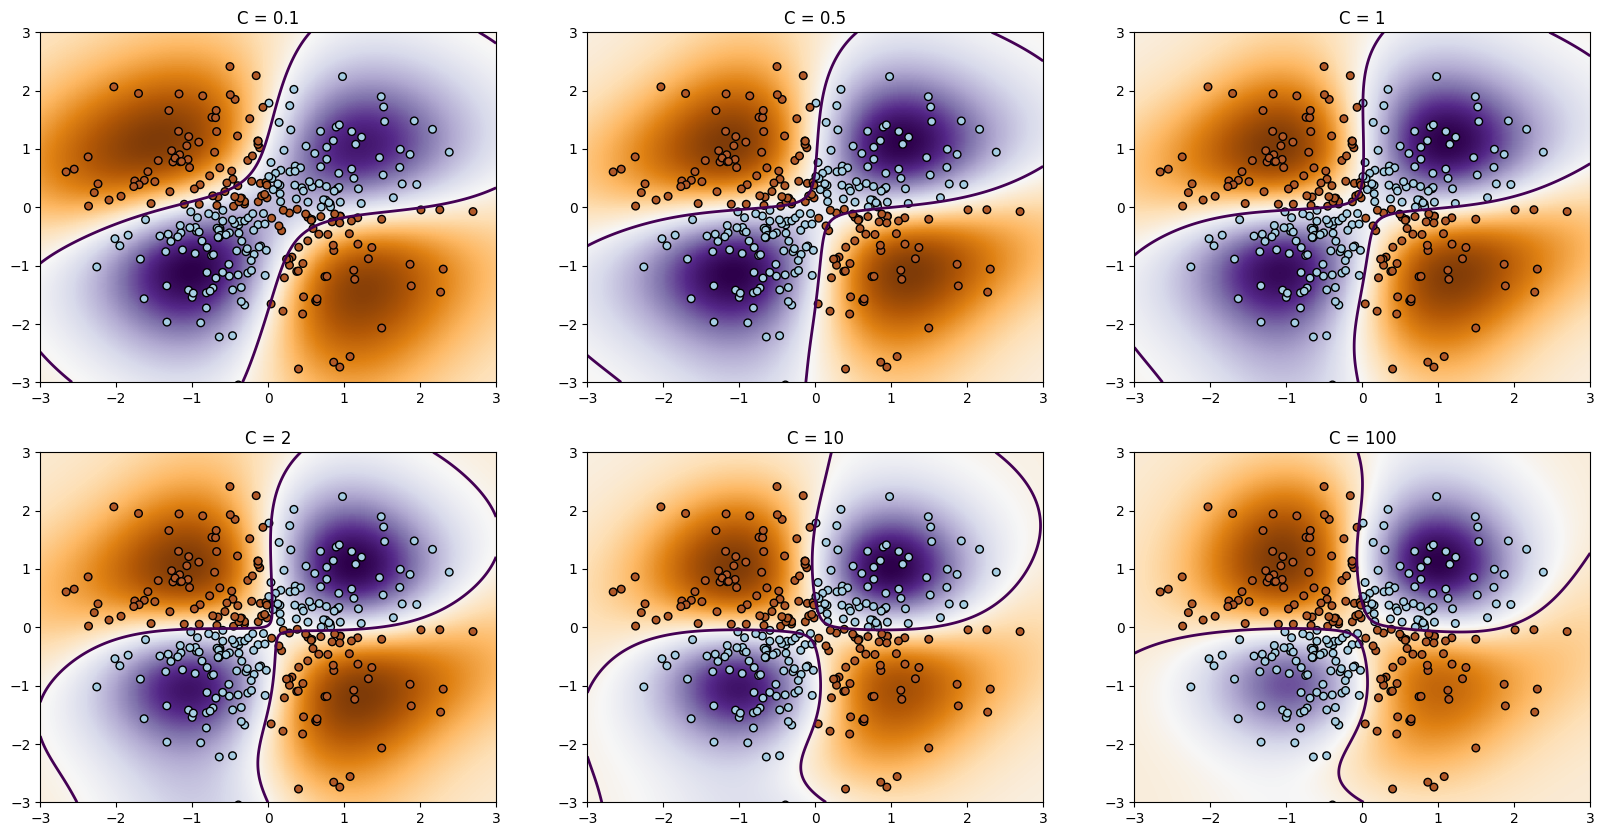

In [18]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    
    c_values = [0.1, 0.5, 1, 2, 10, 100]
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))

    for i, c_val in enumerate(c_values):
        row = i // 3
        col = i % 3
        svm_model_rbf_c = svm.SVC(C=c_val, kernel='rbf')
        svm_model_rbf_c.fit(train_X, train_Y)
        plot_svm(svm_model_rbf_c, train_X, train_Y, ax=ax[row, col])
        ax[row, col].set_title(f'C = {c_val}')

    plt.show()
    
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (a):</font>**


- **(b)** Now change the gamma parameter: 0.01, 0.5, 1, 2, 10, 100 and do the same as in the subtask **(a)**. What does the gamma parameter do? (Hint: check out the Gaussian kernel formula and rememeber that $\gamma = \frac{1}{2\sigma}$).

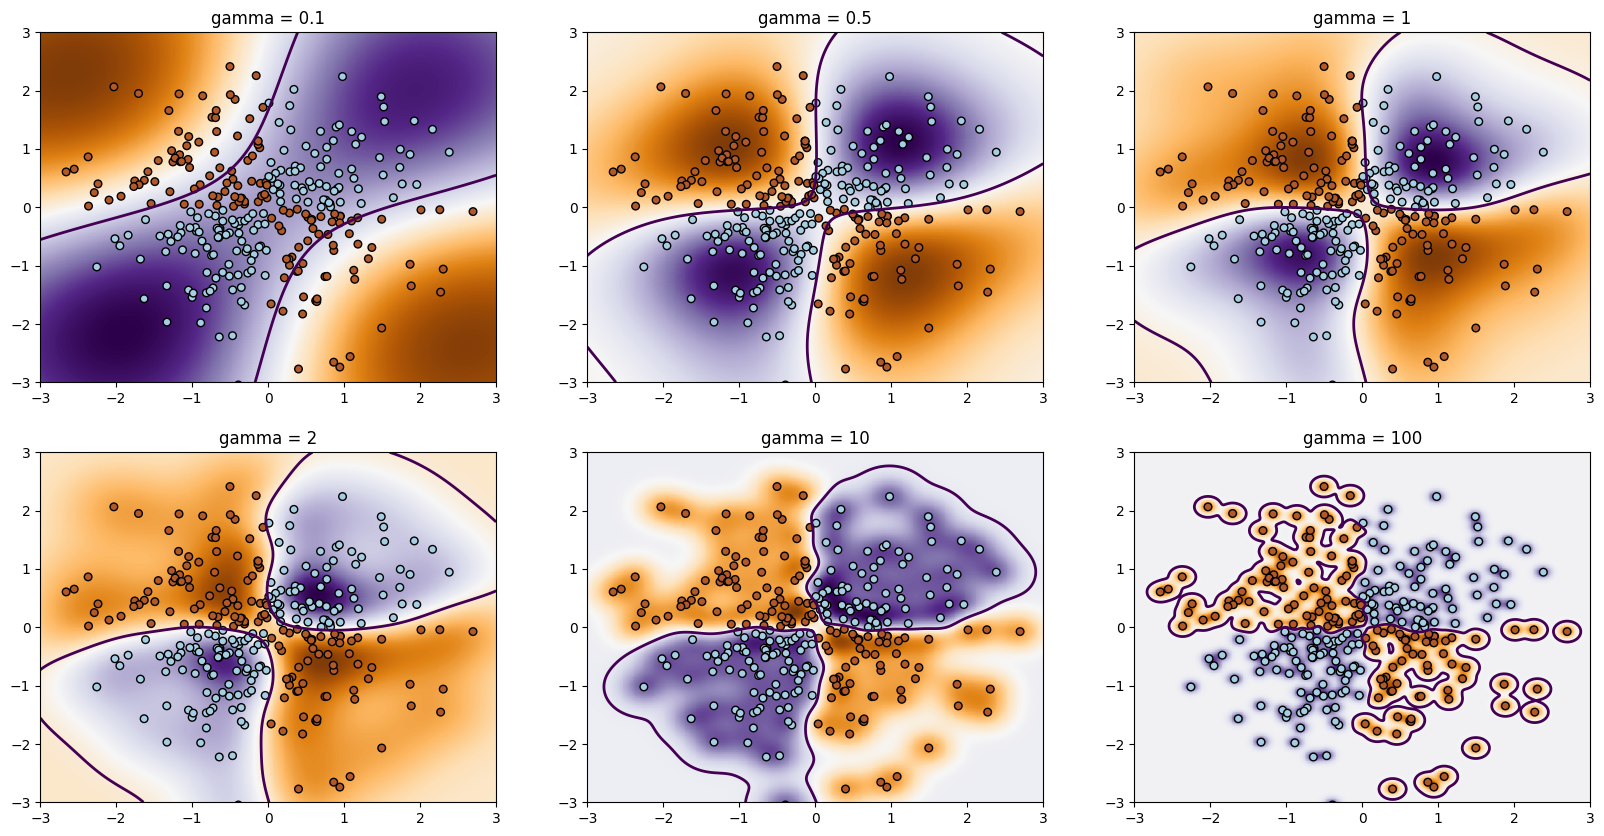

In [19]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    g_values = [0.1, 0.5, 1, 2, 10, 100]
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))

    for i, g_val in enumerate(g_values):
        row = i // 3
        col = i % 3
        svm_model_rbf_g = svm.SVC(gamma=g_val, kernel='rbf')
        svm_model_rbf_g.fit(train_X, train_Y)
        plot_svm(svm_model_rbf_g, train_X, train_Y, ax=ax[row, col])
        ax[row, col].set_title(f'gamma = {g_val}')

    plt.show()
    
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (b):</font>** gamma parameter infulence the training points, if the point are similar then it decreases the distance. So, high gamma means model sees all close points to each other similar and then results to overfit; low gamma means model sees points that are far from each other are still similar which tends to underfit.


## Task 4: Decision tree learning (2 points)

The goal of this task is to understand better how the parameter values affect the performance of decision trees. We will do this on the dataset 'adult.data.csv' originating from https://archive.ics.uci.edu/ml/datasets/adult . This data file has been packaged together with the notebook. The following code loads the dataset and prepares it for the task.

**Install graphiz package for decision tree visualization in case it is not installed**
!pip install graphviz

#### In case you still have some issues with graphviz package:
**For Windows Users**: You can download graphviz from [<a href = "https://graphviz.gitlab.io/_pages/Download/Download_windows.html">HERE</a>] Then add it to the system path using the following commands. <br>
```
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'```

**For Ubuntu Linux Users:** try to use the following command to install graphviz
```sudo apt-get install graphviz```

**For MAC Users:** Use the following package
```brew install graphviz```

In [20]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#'C:/Program Files/Graphviz/bin/'

# import os
# os.environ["PATH"] += os.pathsep + 'c:/users/ali nasser/appdata/roaming/python/python312/site-packages'

In [21]:
np.random.seed(0)
data = pd.read_csv("adult.data.csv", dtype="category", header = None, index_col = None, na_values=["NA", " ?", ""])
data.columns = ["age", "workclass", "not_needed1", "education1", "education", "marital_status",
               "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
               "hours_per_week", "country", "income"]
data.dropna(inplace = True)
data["age"] = pd.to_numeric(data["age"])
data["education"] = pd.to_numeric(data["education"])
data["capital_gain"] = pd.to_numeric(data["capital_gain"])
data["capital_loss"] = pd.to_numeric(data["capital_loss"])
data["hours_per_week"] = pd.to_numeric(data["hours_per_week"])
data["capital_gain"] = data["capital_gain"] - data["capital_loss"]
data["income"] = data.income.str.strip()
data.drop(["not_needed1", "education1", "relationship", "capital_gain", "capital_loss",
          "country"], axis = 1, inplace = True)
a = data[data.income == ">50K"].index
b = data[data.income == "<=50K"].index
b = np.random.choice(b, size = len(a), replace = False)
data = data.loc[np.concatenate([a, b])]

In [22]:
data.head()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,income
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,White,Male,45,>50K
8,31,Private,14,Never-married,Prof-specialty,White,Female,50,>50K
9,42,Private,13,Married-civ-spouse,Exec-managerial,White,Male,40,>50K
10,37,Private,10,Married-civ-spouse,Exec-managerial,Black,Male,80,>50K
11,30,State-gov,13,Married-civ-spouse,Prof-specialty,Asian-Pac-Islander,Male,40,>50K


The decision tree implementation in sklearn requires all features to be numeric. We will therefore create a new binary feature for each value of each textual variable.

In [23]:
data = pd.get_dummies(data, columns = ["workclass", "marital_status", "occupation", "race", "sex"])
data.head()

,age,education,hours_per_week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
7,52,9,45,>50K,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
8,31,14,50,>50K,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
9,42,13,40,>50K,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
10,37,10,80,>50K,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
11,30,13,40,>50K,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


We will consider the binary classification task of predicting income:

In [24]:
data.income.value_counts()

income
>50K     7508
<=50K    7508
Name: count, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["income"], axis = 1),
                                                    data["income"], test_size = 0.5, random_state = 0)

- **(a)** First build a decision tree of maximum depth 2, calculate train and test accuracies.

In [26]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # fit the model here:

    dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    print(f"Training Accuracy: {train_accuracy}, Testing Accuracy: {test_accuracy}")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Training Accuracy: 0.7559936068193926, Testing Accuracy: 0.7566595631326585


**<font color='purple'>Answer to (a):</font>**


- **(b)** Plot the tree using the following code. Interpret the tree by verbally explaining what decisions it makes on different feature values.

In [27]:
from sklearn.tree import export_graphviz
import graphviz
try:
    dot_data = tree.export_graphviz(dt, out_file=None,
                                    feature_names=X_train.columns,  
                                    class_names=["<=50K", ">50K"],  
                                    filled=True, rounded=True, 
                                    special_characters=False) 


    graph = graphviz.Source(dot_data)
    graph.render("decision_tree", format='png')
    graph.view()

except Exception as e:
    print("Exception:", e)    

**<font color='purple'>Answer to (b):</font>**


**(c)** Explain how decision tree deals with:

1. binary features
2. categorical features
3. continuous features

by describing what all possible splits are that the learning algorithm considers in case of these three types.

**<font color='purple'>Answer to (c):</font>** 
1. binary features: the decision tree does only one split by dividing data on two values like gender (male/female).

2. categorical features: the decision tree does multiple splits just to make category and separate them or group them into subsets, like education.

3. continuous features: the decision tree does many splits depends on threshold value like age

- **(d)** Next, build a tree with the default parameters and calculate the train and test accuracy. Is the model good? Why/why not? Explain what are the default parameters used in sklearn for decision tree and how they influence this kind of result?

In [28]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    
    dt_default = DecisionTreeClassifier().fit(X_train, y_train)

    train_pred_default = dt_default.predict(X_train)
    test_pred_default = dt_default.predict(X_test)

    train_accuracy_default = accuracy_score(y_train, train_pred_default)
    test_accuracy_default = accuracy_score(y_test, test_pred_default)

    print(f"Default Training Accuracy : {train_accuracy_default}, Default Testing Accuracy: {test_accuracy_default}")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Default Training Accuracy : 0.9790889717634523, Default Testing Accuracy: 0.7334842834310069


**<font color='purple'>Answer to (d):</font>**

The model was not good, because if we looked at the results above, we notice that training accuracy is much higher than test accuracy. The model should have similar performance across both of the sets.

There are multiple parameters that affect how decision tree perform. For instance,
1. criterion param: is responsible to measure the quality of a split aka impurity
2. splitter param: is responsible to form the strategy used to choose the split at each node
3. max_depth param: is responsible to the maximum depth of the tree
4. random_state: is responsible to control the randomness of the estimator.

- **(e)** Modify the learning algorithm to get rid of the problem you had in the previous step. Try to change at least 3 parameters (first one at a time, then all together, try different combinations). Report the three parameters you experimented with and explain how they can be used to improve the tree (what do they do?). Which values did you try and what gave the best results? Build the final tree (don't show the experimenting code) and report train and test accuracies. You should achieve test accuracy > 79% without too much overfitting (meaning that training accuracy should be quite similar).

In [29]:
final_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=4, min_samples_leaf=2, random_state=0).fit(X_train, y_train)

train_pred_final_tree = final_tree.predict(X_train)
test_pred_final_tree = final_tree.predict(X_test)

train_accuracy_final_tree = accuracy_score(y_train, train_pred_final_tree)
test_accuracy_final_tree = accuracy_score(y_test, test_pred_final_tree)
print(f"Final tree Training Accuracy : {train_accuracy_final_tree}, Final tree Testing Accuracy: {test_accuracy_final_tree}")

Final tree Training Accuracy : 0.8116675546084177, Final tree Testing Accuracy: 0.8004794885455514


**<font color='purple'>Answer to (e):</font>**

After trying muliple param values, the model achieved more than 79% in a test accuracy and of course keeping the training accuracy similar to the test accuracy results. This means that the model function properly and does generalize on the data, the parameters was max_depth, min_samples_split, and min_samples_leaf, because they were the most effecitive to reduce overfitting.


- **(f)** Now build a tree with max_depth = 7 and visualize it. Explain how to classify the first testing instance X_test.iloc[0] by visually exploring the tree (list all the nodes visited along the path through the tree until the decision). Is the decision the same as the true label? Does the decision path make sense?

In [30]:
from sklearn.tree import export_graphviz
import graphviz
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    decision_tree_depth = DecisionTreeClassifier(max_depth=7).fit(X_train, y_train)

    dot_data = export_graphviz(decision_tree_depth, out_file=None,
                            feature_names=X_train.columns,  
                            class_names=["<=50K", ">50K"],  
                            filled=True, rounded=True,  
                            special_characters=False) 

    # Generate and display the graph
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree_depth", format='png')
    graph.view()

    first_test_instance = X_test.iloc[0]
    true_label = y_test.iloc[0]

    predicted_label = decision_tree_depth.predict([first_test_instance])
    print(f" The Answer: \n Predicted Label: {predicted_label[0]}, True Label: {true_label} \n")
    print(f"The first test instance: \n {first_test_instance} \n")

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

 The Answer: 
 Predicted Label: <=50K, True Label: <=50K 

The first test instance: 
 age                                         58
education                                    9
hours_per_week                              16
workclass_ Federal-gov                   False
workclass_ Local-gov                     False
workclass_ Never-worked                  False
workclass_ Private                       False
workclass_ Self-emp-inc                  False
workclass_ Self-emp-not-inc              False
workclass_ State-gov                      True
workclass_ Without-pay                   False
marital_status_ Divorced                 False
marital_status_ Married-AF-spouse        False
marital_status_ Married-civ-spouse       False
marital_status_ Married-spouse-absent    False
marital_status_ Never-married             True
marital_status_ Separated                False
marital_status_ Widowed                  False
occupation_ Adm-clerical                  True
occupation_ Armed-For

C:\Users\Ali Nasser\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**<font color='purple'>Answer to (f):</font>**

Yes, the decision path was correct and made sense


- **(g)** What seem to be the most important features? Check out the feature importances given by the sklearn model from **(f)**. Do they agree with your guess? How are these feature importances calculated? Hint: feature importances are given by `dt.feature_importances_`

In [31]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    

    importances = decision_tree_depth.feature_importances_

    feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    print(feature_importances)

    
    
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

                                  Feature  Importance
13     marital_status_ Married-civ-spouse    0.540809
1                               education    0.232455
0                                     age    0.107759
2                          hours_per_week    0.051972
21            occupation_ Exec-managerial    0.011620
25              occupation_ Other-service    0.006689
27             occupation_ Prof-specialty    0.006095
8             workclass_ Self-emp-not-inc    0.005203
37                            sex_ Female    0.004488
22            occupation_ Farming-fishing    0.003976
6                      workclass_ Private    0.003147
12      marital_status_ Married-AF-spouse    0.002758
23          occupation_ Handlers-cleaners    0.002571
35                            race_ Other    0.002129
7                 workclass_ Self-emp-inc    0.002105
38                              sex_ Male    0.002085
28            occupation_ Protective-serv    0.002001
31           occupation_ Tra

**<font color='purple'>Answer to (g):</font>**

The most important features are (marital status, education, age, hour per week) and the decision tree above proved that the importance was valued correctly


 ## <font color='red'>This was the last task! Please restart and run all before submission!</font>